In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import config

In [2]:
df = pd.read_csv(os.path.join(config.INPUT_PATH, 'train.csv'))
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
train = df[:14736]
val = df[14736:]

val.head()

,ID,Datetime,Count
14736,14736,01-05-2014 00:00,280
14737,14737,01-05-2014 01:00,216
14738,14738,01-05-2014 02:00,208
14739,14739,01-05-2014 03:00,154
14740,14740,01-05-2014 04:00,120


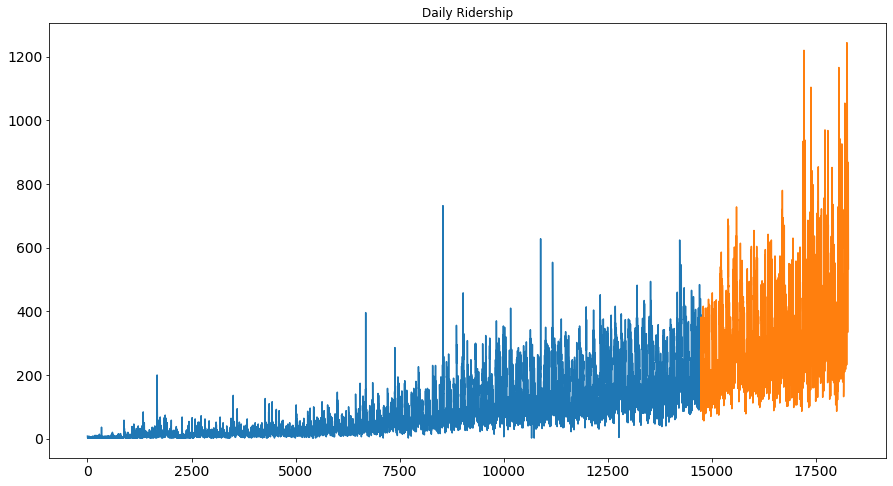

In [4]:
train.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14)
val.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14)
plt.show()

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing    #Holt Winter Method

In [6]:
y_hat_avg = val.copy() #This line helps copy the index of the val observations for plotting
model = ExponentialSmoothing(np.asarray(train.Count), seasonal_periods=7*24, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = model.forecast(len(val))

c:\users\ace_1\anaconda3\envs\ml\lib\site-packages\statsmodels-0.13.0.dev0+224.g5ce985f7d-py3.7-win-amd64.egg\statsmodels\tsa\holtwinters\model.py:432: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


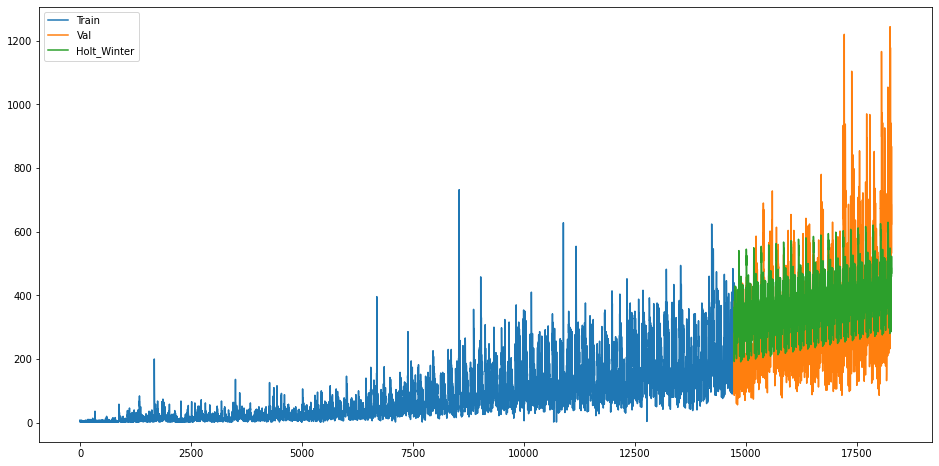

In [7]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(val['Count'], label='Val')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()